In [19]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import seaborn as sbn
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 1. Fit a polynomial model 
of degree $M=10$ to the data below. Perform Lasso regularization, fitting the model over data1_1, selecting the optimal value of the regularization parameter over the data1_2 (based on validation R2) and testing performance over the data1_3.

Important - standardize the data before training Lasso model and apply the same $\mu$ and $\sigma$ defined over data1_1 to data1_2 and data1_3 during validation/testing (as we are not supposed to learn anything, including normalization coefficients from validation and test data; all the parameters of the model are to be learned from training data exclusively).

Visualize the final model against all the data from from training, validation and test samples on the same plot using different colors for points from different samples. For comparison also visualize the true model used to generate the data below - $y=x^4/100+x^3/20+x^2/3+2$.

Output the coefficients of the model.

In [3]:
#generate data and put it in the dataframe
np.random.seed(2018)
x=np.arange(-10,20,0.5)
y=x**4/100+x**3/20+x**2/3+2*x+np.random.normal(loc=0,scale=3,size=60)
data1=pd.DataFrame({'x':x,'y':y}) #create a dataframe
#slice the data in three pieces (we'll talk about those later)
data1_2=data1.loc[40:49]
data1_3=data1.loc[50:59]
data1=data1.loc[0:39] 
data1.head() #for now let's stick with this first one

,x,y
0,-10.0,62.503031
1,-9.5,51.410761
2,-9.0,44.605198
3,-8.5,24.739247
4,-8.0,22.200164


40

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


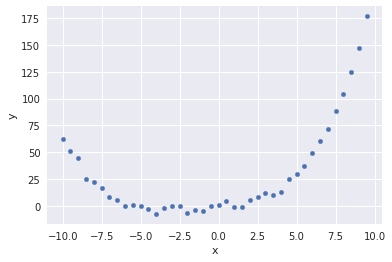

In [4]:
#visualize the observations
data1.plot(x='x',y='y',kind='scatter')
data1['y'].size

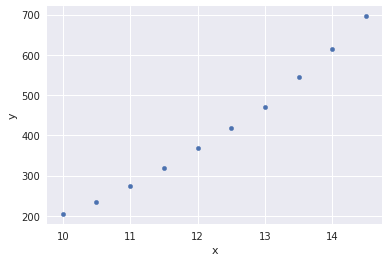

In [5]:
data1_2.plot(x='x',y='y',kind='scatter')


In [6]:
#bi-variate regression with an intercept of price vs size
lm = smf.ols(formula='y~x', data = data1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     16.70
Date:                Mon, 15 Oct 2018   Prob (F-statistic):           0.000218
Time:                        02:06:47   Log-Likelihood:                -200.78
No. Observations:                  40   AIC:                             405.6
Df Residuals:                      38   BIC:                             408.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     30.5075      5.946      5.131      0.0

In [7]:
M=10
for p in range(1,M+1): #add more powers of x up to 10'th
    data1['x%d'%p]=data1.x**p
data1.head()

,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-10.0,62.503031,-10.0,100.00,-1000.000,10000.0000,-100000.00000,1000000.000000,-1.000000e+07,1.000000e+08,-1.000000e+09,1.000000e+10
1,-9.5,51.410761,-9.5,90.25,-857.375,8145.0625,-77378.09375,735091.890625,-6.983373e+06,6.634204e+07,-6.302494e+08,5.987369e+09
2,-9.0,44.605198,-9.0,81.00,-729.000,6561.0000,-59049.00000,531441.000000,-4.782969e+06,4.304672e+07,-3.874205e+08,3.486784e+09
3,-8.5,24.739247,-8.5,72.25,-614.125,5220.0625,-44370.53125,377149.515625,-3.205771e+06,2.724905e+07,-2.316169e+08,1.968744e+09
4,-8.0,22.200164,-8.0,64.00,-512.000,4096.0000,-32768.00000,262144.000000,-2.097152e+06,1.677722e+07,-1.342177e+08,1.073742e+09


In [8]:
M=10
for p in range(1,M+1): #add more powers of x up to 10'th
    data1_2['x%d'%p]=data1_2.x**p
data1_2.head()

,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
40,10.0,204.579091,10.0,100.00,1000.000,10000.0000,100000.00000,1.000000e+06,1.000000e+07,1.000000e+08,1.000000e+09,1.000000e+10
41,10.5,234.807204,10.5,110.25,1157.625,12155.0625,127628.15625,1.340096e+06,1.407100e+07,1.477455e+08,1.551328e+09,1.628895e+10
42,11.0,272.883209,11.0,121.00,1331.000,14641.0000,161051.00000,1.771561e+06,1.948717e+07,2.143589e+08,2.357948e+09,2.593742e+10
43,11.5,318.039709,11.5,132.25,1520.875,17490.0625,201135.71875,2.313061e+06,2.660020e+07,3.059023e+08,3.517876e+09,4.045558e+10
44,12.0,368.274565,12.0,144.00,1728.000,20736.0000,248832.00000,2.985984e+06,3.583181e+07,4.299817e+08,5.159780e+09,6.191736e+10


In [9]:
M=10
for p in range(1,M+1): #add more powers of x up to 10'th
    data1_3['x%d'%p]=data1_3.x**p
data1_3.head()

,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
50,15.0,780.565002,15.0,225.00,3375.000,50625.0000,7.593750e+05,1.139062e+07,1.708594e+08,2.562891e+09,3.844336e+10,5.766504e+11
51,15.5,869.737016,15.5,240.25,3723.875,57720.0625,8.946610e+05,1.386725e+07,2.149423e+08,3.331606e+09,5.163989e+10,8.004182e+11
52,16.0,976.252678,16.0,256.00,4096.000,65536.0000,1.048576e+06,1.677722e+07,2.684355e+08,4.294967e+09,6.871948e+10,1.099512e+12
53,16.5,1086.327787,16.5,272.25,4492.125,74120.0625,1.222981e+06,2.017919e+07,3.329566e+08,5.493784e+09,9.064743e+10,1.495683e+12
54,17.0,1208.637828,17.0,289.00,4913.000,83521.0000,1.419857e+06,2.413757e+07,4.103387e+08,6.975757e+09,1.185879e+11,2.015994e+12


In [10]:
#create a formulae for multi-variate regression using list comprehension
formula='y~x+'+'+'.join(['x%d'%p for p in range(2,M+1)]); formula

'y~x+x2+x3+x4+x5+x6+x7+x8+x9+x10'

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     978.4
Date:                Mon, 15 Oct 2018   Prob (F-statistic):           7.19e-34
Time:                        02:06:47   Log-Likelihood:                -91.583
No. Observations:                  40   AIC:                             205.2
Df Residuals:                      29   BIC:                             223.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.2196      1.205     -0.182      0.8

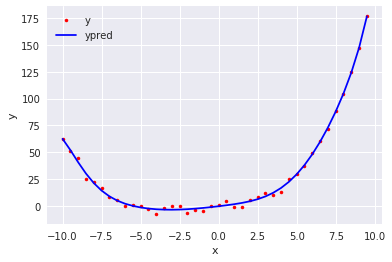

In [11]:
lm = smf.ols(formula=formula, data = data1).fit()
print(lm.summary())
data1['ypred']=lm.predict() #predicted regression values
plt.plot(data1.x,data1.y,'.r') #plot the data
plt.plot(data1.x,data1.ypred,'b') #plot the regression
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [12]:
#standardise the data
for c in data1.columns:
    data1[c]=(data1[c]-data1[c].mean())/data1[c].std()

In [13]:
for c in data1_2.columns:
    data1_2[c]=(data1_2[c]-data1_2[c].mean())/data1_2[c].std()

In [14]:
data1['y'].size

40

In [15]:
for c in data1_3.columns:
    data1_3[c]=(data1_3[c]-data1_3[c].mean())/data1_3[c].std()

In [16]:
formula='y~x+'+'+'.join(['x%d'%p for p in range(2,M+1)]); formula

'y~x+x2+x3+x4+x5+x6+x7+x8+x9+x10'

In [17]:
result = smf.ols(formula = 'y ~ '+ '+'.join(data1.columns[1:]), data = data1).fit()
OLS_coef=result.params
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.254e+28
Date:                Mon, 15 Oct 2018   Prob (F-statistic):               0.00
Time:                        02:06:48   Log-Likelihood:                 1219.0
No. Observations:                  40   AIC:                            -2414.
Df Residuals:                      28   BIC:                            -2394.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.082e-17   2.66e-15      0.008      0.9

In [18]:
data1.corr()

,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,ypred
x,1.000000,0.552558,1.000000,-0.096493,0.915758,-0.128612,0.817987,-0.153088,0.740050,-0.172888,0.677956,-0.189281,0.553377
y,0.552558,1.000000,0.552558,0.742592,0.517604,0.728633,0.443613,0.678983,0.373624,0.624504,0.312271,0.572520,0.998521
x1,1.000000,0.552558,1.000000,-0.096493,0.915758,-0.128612,0.817987,-0.153088,0.740050,-0.172888,0.677956,-0.189281,0.553377
x2,-0.096493,0.742592,-0.096493,1.000000,-0.147029,0.957553,-0.183255,0.893048,-0.212113,0.832562,-0.235948,0.779338,0.743692
x3,0.915758,0.517604,0.915758,-0.147029,1.000000,-0.195969,0.974219,-0.233263,0.928663,-0.263433,0.881193,-0.288413,0.518370
x4,-0.128612,0.728633,-0.128612,0.957553,-0.195969,1.000000,-0.244253,0.982600,-0.282717,0.948779,-0.314486,0.910954,0.729712
x5,0.817987,0.443613,0.817987,-0.183255,0.974219,-0.244253,1.000000,-0.290736,0.987356,-0.328339,0.961034,-0.359474,0.444270
x6,-0.153088,0.678983,-0.153088,0.893048,-0.233263,0.982600,-0.290736,1.000000,-0.336519,0.990399,-0.374334,0.969441,0.679989
x7,0.740050,0.373624,0.740050,-0.212113,0.928663,-0.282717,0.987356,-0.336519,1.000000,-0.380043,0.992379,-0.416081,0.374177
x8,-0.172888,0.624504,-0.172888,0.832562,-0.263433,0.948779,-0.328339,0.990399,-0.380043,1.000000,-0.422749,0.993848,0.625429


# Lasso and Ridge (Ridge is used for reference)

In [19]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data1.ix[:,:-1],
#                                    data1.ix[:,-1], test_size = 0.4, random_state = 200)
X_train = data1.drop(['y','ypred'],axis=1)
y_train = data1['y']

X_valid =data1_2.drop(['y'],axis=1)
y_valid = data1_2['y']

X_test = data1_3.drop(['y'],axis=1)
y_test = data1_3['y']
y_test.shape

(10,)

In [20]:
#Find the Alpha and report best test performance for Ridge/Lasso.
#alpha_l_optimal=Regularization_fit_alpha(2,X_train,X_valid,y_train,y_valid,alphas,Graph=True,logl=True)
def Regularization_fit_alpha(model,X_train0,X_valid,y_train0,y_valid,alphas,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda
    R_2_OS=[]
#     X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
#                                     y_train, test_size = 0.4, random_state = 200)
    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_alpha = alphas[0]
    
    for i in alphas:
        lm = RM(i)
        lm.fit(X_train0,y_train0)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_alpha = i
    
    if Graph==True:
        plt.title('OS-R-squared for different Alpha')
        if logl:
            plt.xlabel('ln(Alpha)')
            l=np.log(alphas)
            bl=np.log(best_alpha)
        else:
            plt.xlabel('Alpha')
            l=alphas
            bl=best_alpha
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_alpha


# Ridge

In [21]:
# Ridge=linear_model.Ridge(fit_intercept=True, alpha=1) #try Ridge with an arbitrary regularization parameter alpha=1

# Ridge.fit(X_train,y_train)
# # In the sample:
# p_IS=Ridge.predict(X_train)
# err_IS=p_IS-y_train
# R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
# print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

# Ridge_coef=Ridge.coef_

# #Out of sample
# p_OS=Ridge.predict(X_test)
# err_OS=p_OS-y_test
# R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
# print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

In [22]:
# #select best lambda for Ridge
# alphas = np.exp(np.linspace(0,13,200))
# alpha_r_optimal=Regularization_fit_alpha(1,X_train,y_train,alphas,Graph=True,logl=True)
# print('Optimal alpha for Ridge={0}'.format(alpha_r_optimal))

# Lasso

In [23]:
X_valid.head()

,x,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
40,-1.486301,-1.486301,-1.403545,-1.323486,-1.246977,-1.174684,-1.107064,-1.044374,-0.986689,-0.933933,-0.885915
41,-1.156012,-1.156012,-1.127548,-1.095258,-1.060142,-1.023192,-0.985332,-0.947376,-0.909999,-0.873732,-0.838968
42,-0.825723,-0.825723,-0.838088,-0.844225,-0.844621,-0.839927,-0.830896,-0.818327,-0.803002,-0.785656,-0.766942
43,-0.495434,-0.495434,-0.535164,-0.569302,-0.597619,-0.620132,-0.637075,-0.648847,-0.655962,-0.659001,-0.658564
44,-0.165145,-0.165145,-0.218778,-0.269403,-0.316209,-0.358602,-0.396213,-0.428889,-0.456662,-0.479717,-0.498352


In [24]:
X_test.head()

,x,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
50,-1.486301,-1.486301,-1.427900,-1.370557,-1.314606,-1.260346,-1.208028,-1.157856,-1.109984,-1.064514,-1.021504
51,-1.156012,-1.156012,-1.136101,-1.114132,-1.090439,-1.065373,-1.039281,-1.012499,-0.985342,-0.958098,-0.931023
52,-0.825723,-0.825723,-0.834736,-0.840617,-0.843497,-0.843553,-0.841007,-0.836112,-0.829139,-0.820370,-0.810084
53,-0.495434,-0.495434,-0.523803,-0.549463,-0.572285,-0.592202,-0.609210,-0.623362,-0.634759,-0.643544,-0.649891
54,-0.165145,-0.165145,-0.203302,-0.240117,-0.275264,-0.308466,-0.339502,-0.368204,-0.394467,-0.418234,-0.439501


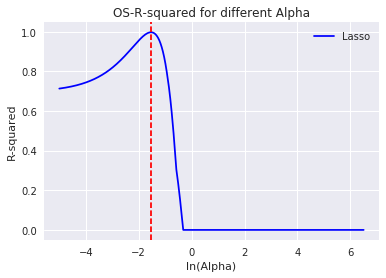

Optimal lambda for Lasso=0.215606193169


In [25]:
#select lambdas for Lasso 
alphas=np.exp(np.linspace(-5,6.5,20000))
alpha_l_optimal=Regularization_fit_alpha(2,X_train,X_valid,y_train,y_valid,alphas,Graph=True,logl=True)
print('Optimal lambda for Lasso={0}'.format(alpha_l_optimal))

In [26]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=alpha_l_optimal)
#try Lasso with an arbirtary regularization parameter alpha

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Lasso))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.874871839796
The R-squared we found for OS Lasso is: 0.998522711065


In [27]:
Lasso_coef

array([ 0.20715328,  0.        ,  0.25896369,  0.20894103,  0.32711544,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

# Track Performance

In [28]:
np.random.seed(2016)
Shuffle = np.random.permutation(len(data1))
train = data1.take(Shuffle)[:30]
test = data1.take(Shuffle)[30:]

In [29]:
# An anonymous function that returns a regression model based on a given features for future usage
Regress = lambda feature: smf.ols(formula = 'Y ~ %s'%feature, data = train).fit()

# For displaying R^2 and linear model summary
def modelEval(lm, key = 'y'):
    lmy = lm.predict(test)
    y_err = lmy - test[key]
    y_norm = test[key]-np.mean(test[key])
    return 1-y_err.dot(y_err)/y_norm.dot(y_norm)  # R2 w.r.t. test set

In [30]:
result = smf.ols(formula = 'y ~ '+ '+'.join(data1.columns[:-1]), data = train).fit()
print('In sample R-squared: %f'%result.rsquared)
print('Out of sample R-squared: %f'%modelEval(result))
print('Fitted coefficients:')
print result.params

In sample R-squared: 1.000000
Out of sample R-squared: 1.000000
Fitted coefficients:
Intercept   -3.009745e-16
x            9.679757e-16
y            1.000000e+00
x1           6.071532e-16
x2          -1.443290e-15
x3          -8.881784e-16
x4           1.909584e-14
x5           5.329071e-15
x6          -2.697842e-14
x7          -7.993606e-15
x8           1.942890e-14
x9           8.881784e-16
x10         -1.409983e-14
dtype: float64


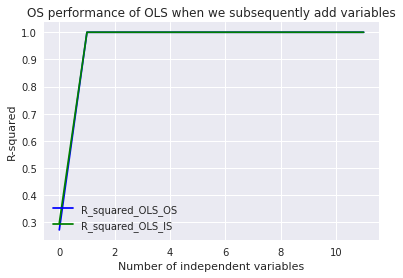

In [31]:
Number_variables=range(len(data1.columns[:-1]))
OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]

for i in Number_variables:
    
    lm = smf.ols(formula = 'y ~ '+ '+'.join(data1.columns[:i+1]), data = train).fit()
    R2 = modelEval(lm)
    OLS_R_2_IS_F.append(lm.rsquared)
    OLS_R_2_OS_F.append(R2 if R2 > 0 else 0)

plt.title('OS performance of OLS when we subsequently add variables')
plt.plot(Number_variables,OLS_R_2_OS_F,'b',label='R_squared_OLS_OS')
plt.plot(Number_variables,OLS_R_2_IS_F,'g',label='R_squared_OLS_IS')
plt.legend(loc='lower left')
plt.xlabel('Number of independent variables')
plt.ylabel('R-squared')
plt.show()

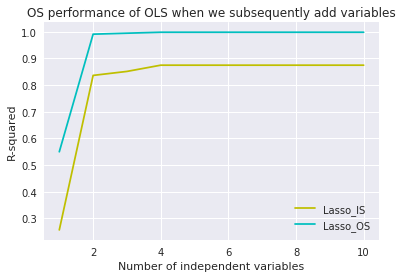

In [32]:
#OLS_R_2_OS_F=[]
#OLS_R_2_IS_F=[]
#OLS_R_2_Ridge_OS_F=[]
#OLS_R_2_Ridge_IS_F=[]
OLS_R_2_Lasso_OS_F=[]
OLS_R_2_Lasso_IS_F=[]

#Ridge=linear_model.Ridge(fit_intercept=True,alpha=alpha_r_optimal)
Lasso=linear_model.Lasso(fit_intercept=True, alpha=alpha_l_optimal)
Number_variables=range(1,M+1)
for j in Number_variables:
    # OLS
#     lm = smf.ols(formula = 'y ~ '+ '+'.join(data1.columns[:j+1]), 
#                  data = pd.concat([X_train.ix[:,:j+1],y_train], axis = 1)).fit()
#     error = lm.predict(X_test.ix[:,:j+1]) - y_test
#     R_2_OS_OLS=1-error.var()/y_test.var()
#     R_2_IS_OLS = lm.rsquared
#     OLS_R_2_IS_F.append(R_2_IS_OLS)
#     OLS_R_2_OS_F.append(max(R_2_OS_OLS,0))
    
    # Ridge
 #   Ridge.fit(X_train.ix[:,:j+1],y_train)
    
    # In sample:
  #  err_IS=Ridge.predict(X_train.ix[:,:j+1]) - y_train
  # R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
  #  OLS_R_2_Ridge_IS_F.append(R_2_IS_Ridge)
    
    #Out of sample
   # err_OS=Ridge.predict(X_test.ix[:,:j+1]) - y_test
    #R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
    #OLS_R_2_Ridge_OS_F.append(max(R_2_OS_Ridge,0))

    # Lasso
    
    Lasso.fit(X_train.ix[:,0:j+1],y_train)
    
    #In sample:
    p_IS=Lasso.predict(X_train.ix[:,0:j+1])
    err_IS=p_IS-y_train
    R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Lasso_IS_F.append(R_2_IS_Lasso)

    #Out of sample
    p_OS=Lasso.predict(X_test.ix[:,0:j+1])
    err_OS=p_OS-y_test
    R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Lasso_OS_F.append(max(R_2_OS_Lasso,0))

plt.title('OS performance of OLS when we subsequently add variables')

#plt.plot(Number_variables,OLS_R_2_IS_F,'g',label='OLS_IS')
plt.plot(Number_variables,OLS_R_2_Lasso_IS_F,'y',label='Lasso_IS')
#plt.plot(Number_variables,OLS_R_2_Ridge_IS_F,'k',label='Ridge_IS')

#plt.plot(Number_variables,OLS_R_2_OS_F,'b',label='OLS_OS')
plt.plot(Number_variables,OLS_R_2_Lasso_OS_F,'c',label='Lasso_OS')
#plt.plot(Number_variables,OLS_R_2_Ridge_OS_F,'r',label='Ridge_OS')

plt.legend(loc='lower right')
plt.xlabel('Number of independent variables')
plt.ylabel('R-squared')
plt.show()

In [33]:
#generate regressors for data1, data1_2, data1_3


In [34]:
#consider just the model of degree M=10


In [35]:
#standardise the data including validation and test sets (using normalization learned from training)

In [36]:
#fit Lasso for various alpha and tune it to optimize Validation R2

In [37]:
#report test R2

In [38]:
#visualize the model against all the data from training, validation and test samples 

### Question 2. P-values and hypothesis testing
Suppose that a multiple regression with 7 regressors gave the following p-values for each of them:
0.02, 0.1, 3e-15, 0.04, 0.001, 0.06, 0.03.

For how many regressors you would reject the null-hypothesis that their corresponding regression coefficient is zero at the 95% confidence level? Please explain.

In [39]:
# Answer here
#1 Regressor (pvalue=0.06 > 5%) should be rejected.
# Pvalue is the probability for a given statistical model that, when the null hypothesis is true, the statistical summary would be greater or equal to the actual observed result.
#In this case, for pvalue=0.06, it tells us that the our observed results lie within the 95% cofidence level (only 94% confidence level is achieved), which rejects the hypothesis.

### Question 3. Confidence intervals
Assume we perform a regression and get an estimate 10 for the slope coefficient for the regressor of interest. Select all statements that can not be true for its confidence intervals:

a. 95%-confidence interval is [-5, 5]

b. 99%-conficence interval is [9.99,10.01]

c. 95%-confidence interval is [9,100]

d. 99%-confidence interval is [8, 12], while 95%-confidence interval is [9, 11].

Explain your choices

In [40]:
#Answer here
#a., c.
#If 10 is the estimate for the slope coefficient for the regressor of interest,
#10 = X, and the interval boundaries should be 10+ Asigma/(SQRT(n).
#In this case, a and b dont satisfy this equation becase a is outside the possible intervals (must be a number greater than 10) 
#and c is not symmetric. 

# Principal component regression

### Question 4

Using the median price per sq.foot from Zillow data below as reported for 2018-08, fit the linear model using N leading principal components of the 311 data and perform cross-validation. Visualize performance depending on the number N of leading PCs. Specifically: 
    1. implement a 20-times-cross-validation as a function of N returing OS R2
    2. run it for N=1,2,...30, return the best N and the corresponding R2
    3. mark it with a vertical line on the plot and put the value of N and the corresponding R2 as text labels
**Important:** keep training pca over the training sample only, applying the same pca transform to the test samples in order to prepare regressors for them

In [41]:
! curl -O https://newclasses.nyu.edu/access/content/attachment/ca49ef3c-5752-42fb-b3d1-b54519baa731/Assignments/ce93285c-796d-4760-986b-855fddc3e273/Zip_MedianListingPricePerSqft_AllHomes.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [3]:
# Write code here
zillow=pd.read_csv("data/Zip_MedianListingPricePerSqft_AllHomes.csv",index_col=0)
zillow.head()

,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
RegionName,,,,,,,,,,,,,,,,,,,,,
10023,New York,NY,"New York, NY",New York,1,NaN,NaN,NaN,NaN,1366.621067,...,1954.992968,1983.055556,1963.986600,1702.573836,1522.948540,1568.100358,1612.378790,1569.371728,1599.538839,1619.794484
60614,Chicago,IL,"Chicago, IL",Cook,2,347.391304,333.975410,332.666667,324.490763,325.832510,...,514.255544,522.193211,519.321330,520.408163,476.592732,463.928571,470.769231,461.960986,455.861397,436.111111
79936,El Paso,TX,"El Paso, TX",El Paso,3,88.688320,88.159032,87.940589,87.929656,87.368706,...,88.419016,88.540363,88.755279,88.455330,88.367347,89.118199,90.128755,90.316333,90.726125,91.668726
10002,New York,NY,"New York, NY",New York,4,NaN,NaN,NaN,NaN,NaN,...,2041.247701,2043.165468,2063.785322,2012.302285,2015.369804,2026.353276,2022.274326,2013.831259,1997.942387,2030.259366
926,San Juan,TX,"Brownsville, TX",Cameron,5,NaN,NaN,NaN,NaN,NaN,...,92.968750,92.954963,93.776641,92.968750,95.090118,103.846154,100.411523,108.447489,102.270729,102.270729


**Load/process 311 data**

In [4]:
data311 = pd.read_csv( 'data/aggr311.csv' , index_col=0 )
data311.head()

,Zip,Complain,Count
1,NaN,Adopt-A-Basket,5
2,10001,Adopt-A-Basket,1
3,10003,Adopt-A-Basket,1
4,10009,Adopt-A-Basket,1
5,10010,Adopt-A-Basket,1


In [5]:
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,8,8,0,0,0,0,0
10001.0,0,1,90,0,0,1,20,36,1,1,...,3,0,2,51,5,5,2,366,0,0
10002.0,15,0,80,0,0,21,18,20,2,6,...,5,1,4,27,14,10,7,324,0,0
10003.0,15,1,143,0,2,44,24,13,2,2,...,7,11,2,54,25,12,5,318,0,0
10004.0,0,0,15,0,0,4,3,1,0,1,...,1,1,0,16,21,0,0,37,0,0


In [6]:
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity

In [7]:
zillow.shape

(10445, 109)

# Start

In [47]:
zillow=zillow.apply(pd.to_numeric, errors='coerce')
zillow.head()

,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
RegionName,,,,,,,,,,,,,,,,,,,,,
10023,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1366.621067,...,1954.992968,1983.055556,1963.986600,1702.573836,1522.948540,1568.100358,1612.378790,1569.371728,1599.538839,1619.794484
60614,NaN,NaN,NaN,NaN,2,347.391304,333.975410,332.666667,324.490763,325.832510,...,514.255544,522.193211,519.321330,520.408163,476.592732,463.928571,470.769231,461.960986,455.861397,436.111111
79936,NaN,NaN,NaN,NaN,3,88.688320,88.159032,87.940589,87.929656,87.368706,...,88.419016,88.540363,88.755279,88.455330,88.367347,89.118199,90.128755,90.316333,90.726125,91.668726
10002,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,2041.247701,2043.165468,2063.785322,2012.302285,2015.369804,2026.353276,2022.274326,2013.831259,1997.942387,2030.259366
926,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,...,92.968750,92.954963,93.776641,92.968750,95.090118,103.846154,100.411523,108.447489,102.270729,102.270729


In [8]:
#merge income data with 311

zillow1=zillow.merge(data311,left_index=True,right_index=True)

In [9]:
data311.shape

(179, 162)

In [10]:
zillow

,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
RegionName,,,,,,,,,,,,,,,,,,,,,
10023,New York,NY,"New York, NY",New York,1,NaN,NaN,NaN,NaN,1366.621067,...,1954.992968,1983.055556,1963.986600,1702.573836,1522.948540,1568.100358,1612.378790,1569.371728,1599.538839,1619.794484
60614,Chicago,IL,"Chicago, IL",Cook,2,347.391304,333.975410,332.666667,324.490763,325.832510,...,514.255544,522.193211,519.321330,520.408163,476.592732,463.928571,470.769231,461.960986,455.861397,436.111111
79936,El Paso,TX,"El Paso, TX",El Paso,3,88.688320,88.159032,87.940589,87.929656,87.368706,...,88.419016,88.540363,88.755279,88.455330,88.367347,89.118199,90.128755,90.316333,90.726125,91.668726
10002,New York,NY,"New York, NY",New York,4,NaN,NaN,NaN,NaN,NaN,...,2041.247701,2043.165468,2063.785322,2012.302285,2015.369804,2026.353276,2022.274326,2013.831259,1997.942387,2030.259366
926,San Juan,TX,"Brownsville, TX",Cameron,5,NaN,NaN,NaN,NaN,NaN,...,92.968750,92.954963,93.776641,92.968750,95.090118,103.846154,100.411523,108.447489,102.270729,102.270729
77084,Houston,TX,"Houston, TX",Harris,6,62.749572,63.458488,63.573701,63.793103,63.261344,...,88.397083,88.246634,88.570488,90.556274,91.753568,92.504443,93.656227,92.778335,93.208991,93.765401
94109,San Francisco,CA,"San Francisco, CA",San Francisco,7,NaN,NaN,NaN,NaN,NaN,...,1247.963801,1219.444444,1222.716510,1182.707993,1108.333333,1131.510417,1110.797838,1140.626435,1161.492436,1166.666667
75070,McKinney,TX,"Dallas, TX",Collin,8,86.536826,88.131610,87.241016,87.154145,87.117659,...,141.381854,142.265889,142.912471,143.697944,144.293643,144.499593,140.970528,141.220989,140.364964,140.566431
77494,Katy,TX,"Houston, TX",Fort Bend,9,98.176079,97.886975,97.799511,98.331210,98.294070,...,120.674370,120.655672,119.831223,119.911504,119.911504,120.066780,120.005523,119.689101,119.466146,120.083494


In [11]:
zillow.shape

(10445, 109)

In [13]:
data=zillow1.iloc[:,109:]
Y=zillow1['2018-08']
lm=sm.OLS(Y,sm.add_constant(data)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                2018-08   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 15 Oct 2018   Prob (F-statistic):                nan
Time:                        02:28:57   Log-Likelihood:                 2452.3
No. Observations:                 100   AIC:                            -4705.
Df Residuals:                       0   BIC:                            -4444.
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------

In [53]:
data311.shape

(179, 162)

In [17]:
data.shape

(100, 162)

In [20]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=30 #number of runs 
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(data.iloc[:,:]),Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    res=sm.OLS(y_train,X_train).fit()
    R_IS.append(res.rsquared)                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 1.000+-0.000
OS R-squared is 0.327+-0.367


In [21]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=20 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:],Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    pca = PCA(5) #take only 5 leading principal components to get enough data but avoid overfitting
    P_train=pca.fit_transform(X_train)
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit()
    #and apply the same rotation transform we learned for training sample to the test sample
    #this is important that we learn PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(X_test)
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)                                                                     
    R_OS.append(1-((y_pred-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.837+-0.019
OS R-squared is 0.796+-0.059


### Question 5
1. Using the Zillow dataset from question 4, run PCA on the price dynamics for zip codes over the last 5 years 
    1. take only those zip codes within NYC having price defined for the last 60 months from 2013-09 till 2018-08:
    2. normalize each zip code timeline by average price over this period
    3. standardize those normalized prices per month and use them as features
    4. run pca over those features

2. Visualize zip codes in the 2d space of first two principal components, coloring them by borough (feel free to use borough definition from the class notebook). 

# Apply PCA to 311

In [56]:
data311.shape

(179, 162)

In [57]:
scaler311 = preprocessing.StandardScaler().fit(data)
data311S=scaler311.transform(data)  

In [70]:
# create borough labels 
Z=np.array(data.index)
manhattanInd=(Z>10000)&(Z<10300) #Manhattan
statenInd=(Z>=10300)&(Z<10400) #Staten Island
brooklynInd=(Z>=11000)&(Z<11300) #Brooklyn
queensInd=(Z>=11300)&(Z<11500) #Queens
bronxInd=(Z>=10400)&(Z<10500) #Bronx
#create an array of the same length as data311 index providing the borough number
D=Z*0
D[manhattanInd]=1
D[statenInd]=2
D[brooklynInd]=3
D[queensInd]=4
D[bronxInd]=5

In [71]:
data311S[1][0]

-0.49030315602988511

In [72]:
pd.DataFrame(data311S)
df = pd.DataFrame(data311S)

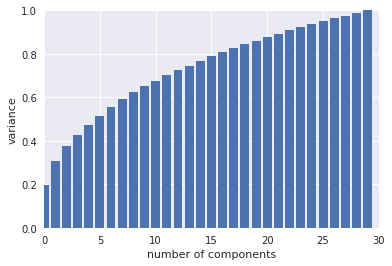

In [73]:
n=30 # how many eigenvectors we choose
from sklearn.decomposition import PCA
pca = PCA(n)
P = pca.fit_transform(df) #find principal components

#Plot explained variance per number of leading PC's to choose
eigenvalues = pca.explained_variance_
plt.bar(np.arange(n), eigenvalues.cumsum()/eigenvalues.sum(),align='center');
plt.ylim(0,1)
plt.xlim(0,30)
plt.xlabel('number of components')
plt.ylabel('variance')

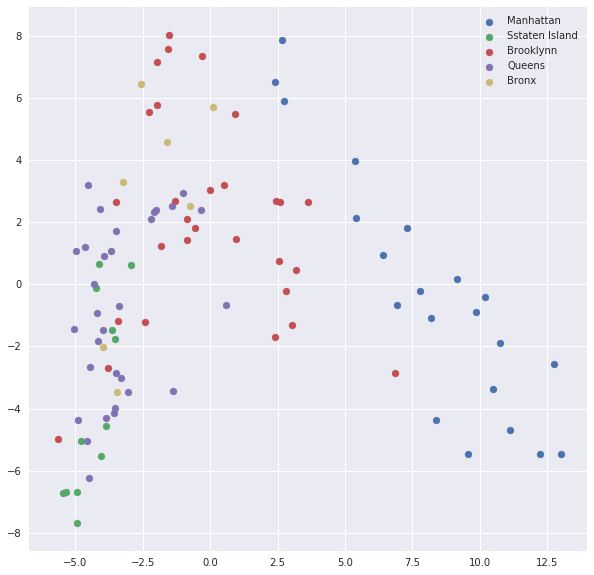

In [74]:
# df.head()
plt.figure(figsize=(10,10))
for d, label in zip(range(1,6), ["Manhattan", "Sstaten Island", "Brooklynn", "Queens", "Bronx"]):
    ind=D==d #take only images of a certain digit
    print 
    plt.scatter(P[ind, 0], P[ind, 1], label=label)
plt.legend()
plt.show()